### we have cleaned the date and done some exploratory data analysis, we have a data frame which is ready for prerpocessing to be used for modelling

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#import the dataset
data = pd.read_csv('/Users/gargi/Desktop/DSC_SB/adanced_ml/tf_dw.csv')

In [5]:
data.head()

,Unnamed: 0,text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",1
1,1,U.S. military to accept transgender recruits o...,1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,3,FBI Russia probe helped by Australian diplomat...,1
4,4,Trump wants Postal Service to charge 'much mor...,1


#### I wil try to do some classification modelling (supervised) to understand to begin with. MultinomialNB is the probability based most common classifier for NLP, I will start with that. 

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [7]:
x_train, x_test, y_train, y_test = train_test_split(data['text'],data['label'],test_size=0.2, random_state = 1)


accuracy:   93.909


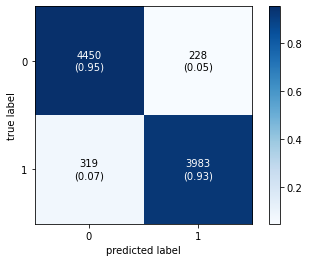

In [11]:
#Multinomial NB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### result summary from Multinomial NB


### SVM, Why SVM?

accuracy:   99.677


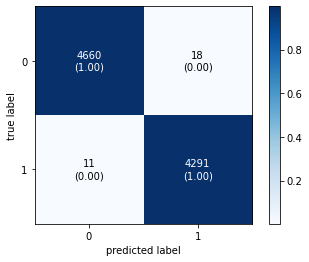

In [12]:

from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### result summary

In [13]:
### Passive Aggressive Classifier why?

accuracy:   99.644


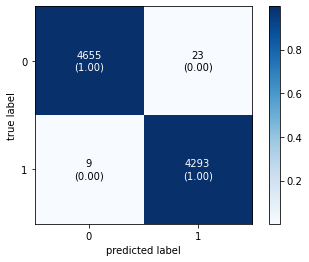

In [14]:
#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


#### result summary
